# Importing Librairies


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importing Data

In [2]:
data =  pd.read_csv('./spotify_songs.csv')
data.shape

(32833, 23)

# Data Exploration

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [6]:
print(data.isna().sum().sort_values(ascending=False))
data.dropna(inplace=True)
data.isna().sum().sum()


track_id                    0
energy                      0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
key                         0
danceability                0
track_name                  0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_name            0
track_album_id              0
track_popularity            0
track_artist                0
duration_ms                 0
dtype: int64


0

In [7]:
print("Total Artists :", data['track_artist'].nunique())
print("Total Genres :", data['playlist_genre'].nunique())
print("Total Sous Genres :", data['playlist_subgenre'].nunique())

Total Artists : 10692
Total Genres : 6
Total Sous Genres : 24


In [8]:
data['track_album_release_date'].value_counts()


track_album_release_date
2020-01-10    270
2019-11-22    244
2019-12-06    235
2019-12-13    220
2013-01-01    219
             ... 
1973-08-28      1
2000-03-23      1
1967-04         1
1968-07-03      1
2014-04-18      1
Name: count, Length: 4529, dtype: int64

# Data Analysis

In [10]:
import plotly.graph_objects as go

count_data = data['playlist_genre'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=count_data.index,  # Categories 
    y=count_data.values  # Counts 
)])

fig.show()


In [13]:
import plotly.graph_objects as go

count_data = data['playlist_subgenre'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=count_data.index,  # Categories 
    y=count_data.values  # Counts 
)])

fig.show()


In [15]:
char_bar = data.groupby(['track_name'])[['track_popularity']].mean().reset_index()
char_bar = char_bar.sort_values(by=("track_popularity"), ascending=False)

top = char_bar.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top['track_name'], y=top["track_popularity"]))

fig.show()

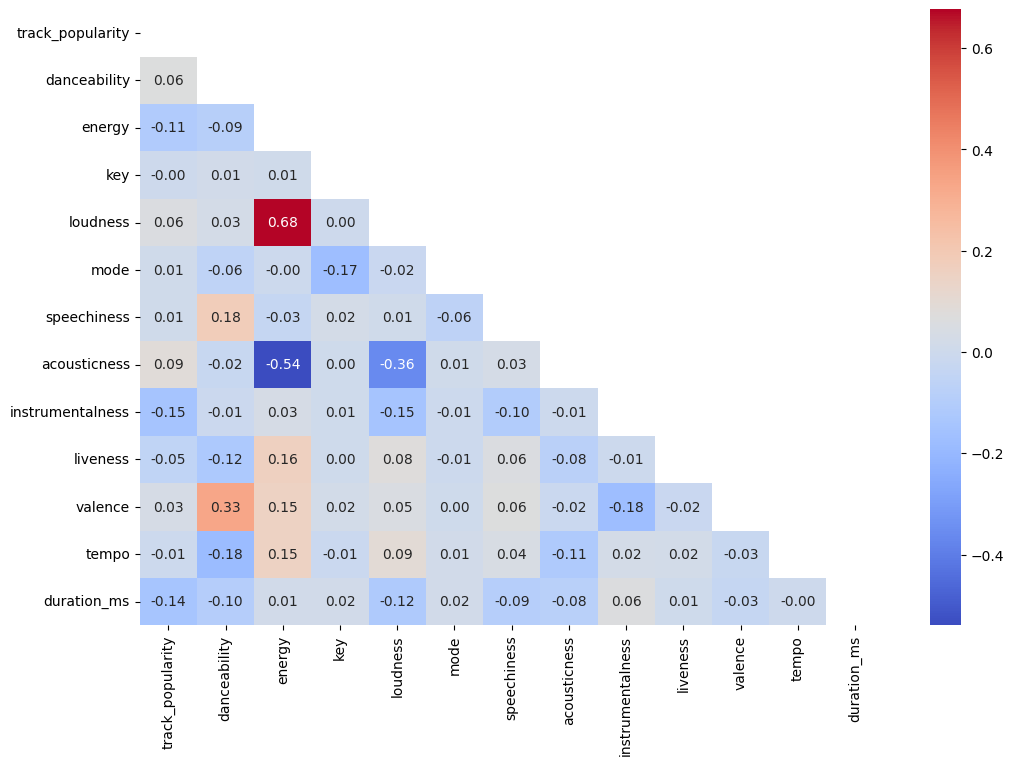

In [31]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.show()

Interpretations

- It looks like track_popularity doesn't have a strong correlation with any of the features given.
- As the loudness of a song increases, the energy of the song is also likely to increase. Conversely, if the loudness decreases, the energy is more likely to decrease.
- With a correlation of -0.14 between track_popularity and duration_ms, there is a weak tendency for longer songs to be associated with slightly lower track popularity on average. However, the relationship is not strong, and other factors may contribute to the overall picture.
- Based on the correlation coefficient of -0.15, there is a weak tendency for songs with higher instrumentalness to be associated with slightly lower track popularity on average. However, the relationship is not strong, and other factors may play a role in determining track popularity.
- Features: energy and acousticness are inversely proportional with a correlation of -0.54. This means that to sing acoustic songs it requires less energy.
- The features: loudness and acousticness have a negative correlation of -0.36.
- Features: danceability and valence have a positive correlation of 0.36.


In [ ]:
playlist_ids = [
    "https://open.spotify.com/playlist/37i9dQZF1DWYN0zdqzbEwl?si=14d622ba551641eb",
    "https://open.spotify.com/playlist/37i9dQZF1DWYZ2zzgvJZul?si=7bfb6c2f141c4684",
    "https://open.spotify.com/playlist/37i9dQZF1DWZeuoGxfO4e2?si=793e7dc435b7435a",
    "https://open.spotify.com/playlist/37i9dQZF1DX5d5pMk8ynO3?si=22492f6d7c9c41e2",
    "https://open.spotify.com/playlist/37i9dQZF1DX11wyL5eCLSa?si=abcd861505e244db",
    "https://open.spotify.com/playlist/37i9dQZF1DXbFNjGW0o442?si=4e824ad93d554cdf",
    "https://open.spotify.com/playlist/37i9dQZF1DWYU4qMGpdTFw?si=6af0ad01c7584a65",
    "https://open.spotify.com/playlist/37i9dQZF1DXdNw9eeM3mpo?si=dfd6bcfd19d74d45",
    "https://open.spotify.com/playlist/37i9dQZF1DWU8yQ1nTMCfh?si=c3c2b5318fbd4cbd",
    "https://open.spotify.com/playlist/37i9dQZF1DWUE25YmPdDOO?si=5c818f675e564ccd" 
]

pop_df = create_global_dataframe(playlist_pop_ids)
pop_df['genre'] = 'pop'
print(pop_df['ID'].nunique)
